### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns

plt.style.use('ggplot')

### Data

In [2]:
cars = sns.load_dataset('mpg').dropna()

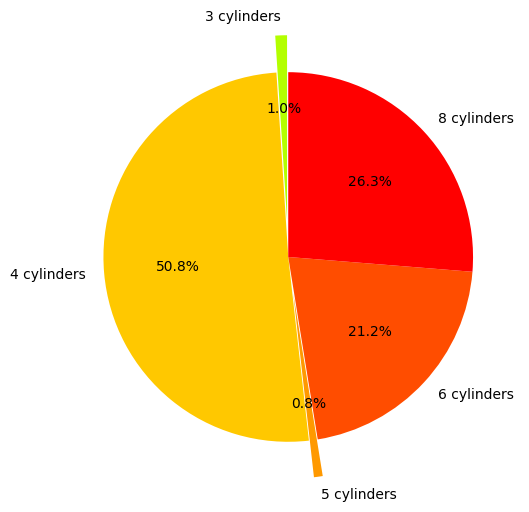

In [3]:
labels = [3, 4, 5, 6, 8]
sizes = [len(cars[cars['cylinders'] == cyl]) for cyl in labels]
colors = ['#b3ff00', '#ffc800', '#ff9900', '#ff4d00', '#ff0000']
explode = [0.2, 0, 0.2, 0, 0]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=[str(cyl) + ' cylinders' for cyl in labels],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode
)
plt.show()

### Bar of pie

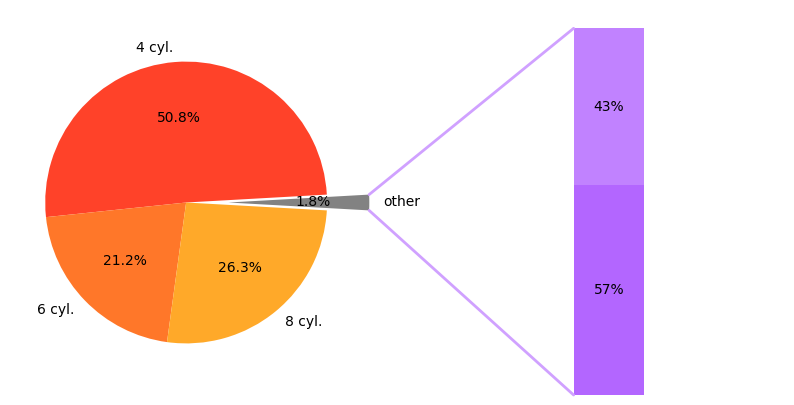

In [43]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))


# pie plot
labels = [3, 4, 5, 6, 8]
sizes = [len(cars[cars['cylinders'] == cyl]) for cyl in labels]
explode = [0.3, 0, 0, 0]
colors = ['#828282', '#ff4229', '#ff7729', '#ffa929']
labels = ['other', '4 cyl.', '6 cyl.', '8 cyl.']

wedges, *_ = ax[0].pie(
    x = [sizes[0]+sizes[2], sizes[1], sizes[3], sizes[4]],
    startangle = -180*((sizes[0]+sizes[2]) / sum(sizes)),
    explode = explode,
    colors = colors,
    labels = labels,
    autopct='%1.1f%%',
)


# bar plot
ratios = [sizes[0]/(sizes[0]+sizes[2]), sizes[2]/(sizes[0]+sizes[2])]
colors = ['#b366ff', '#c182ff']
bottom = 1
width = .2

for height, color in zip(reversed(ratios), reversed(colors)):
    bottom -= height
    bc = ax[1].bar(
        0,
        height,
        width,
        bottom=bottom,
        color=color
    )
    ax[1].bar_label(
        bc,
        labels=[f"{height:.0%}"],
        label_type='center'
    )

ax[1].axis('off')
ax[1].set_xlim(- 2.5 * width, 2.5 * width)


# connections
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(ratios)

# upper line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(
    xyA=(-width / 2, bar_height),
    coordsA=ax[1].transData,
    xyB=(x, y),
    coordsB=ax[0].transData
)
con.set_color('#d0a1ff')
con.set_linewidth(2)
ax[1].add_artist(con)

# lowwer line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
    xyA=(-width / 2, 0),
    coordsA=ax[1].transData,
    xyB=(x, y),
    coordsB=ax[0].transData
)
con.set_color('#d0a1ff')
con.set_linewidth(2)
ax[1].add_artist(con)


plt.show()